<a href="https://colab.research.google.com/github/vvilliscool/class_goorm/blob/master/goorm_20220713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
import numpy
import numpy as np
import sys
import tensorflow as tf

In [3]:
# 난수 생성기의 패턴이 지정되지 않았을때, 
print( numpy.random.rand(4) )
print( numpy.random.rand(4) )

[0.76623492 0.43366441 0.98611334 0.36768228]
[0.1279824  0.23422193 0.5870702  0.11967605]


In [4]:
# 난수 생성기 패턴 지정
numpy.random.seed(0)
print( numpy.random.rand(4) )
numpy.random.seed(0)
print( numpy.random.rand(4) )

[0.5488135  0.71518937 0.60276338 0.54488318]
[0.5488135  0.71518937 0.60276338 0.54488318]


In [5]:
# 처음 다운일 경우, 데이터 다운로드 시간이 걸릴 수 있음. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


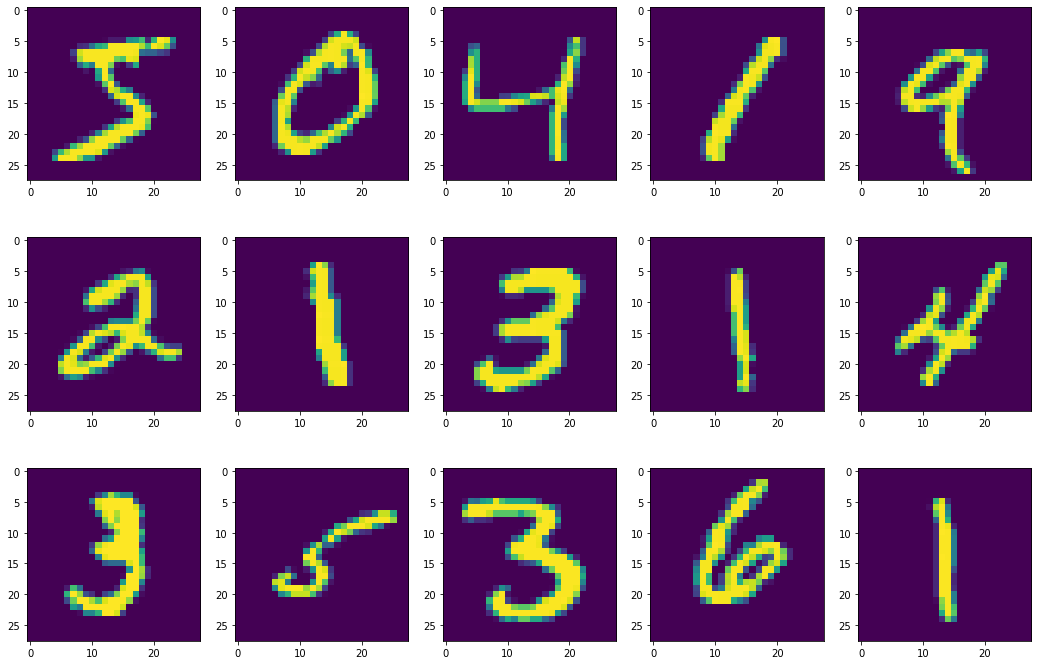

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(18,12) )

print("label={}".format(y_train[0:15]))   # x데이터 0~14개 가져오기

for image, ax in zip( X_train, axes.ravel() ):
    ax.imshow(image) # 이미지 표시

In [7]:
X_train = X_train.reshape(X_train.shape[0],784)   # 60000, 28, 28 -> 60000, 784로 변경
# 데이터 값의 범위 0~255 -> 0~1 
X_train.astype('float64') 
X_train = X_train/255

In [8]:
print(X_train.shape)               # 데이터 크기
print("데이터의 최대, 최소 :", np.min(X_train), np.max(X_train) )

(60000, 784)
데이터의 최대, 최소 : 0.0 1.0


In [9]:
# 테스트 데이터 전처리
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [10]:
# OneHotEncoding - 10진수의 값을 0, 1의 값을 갖는 벡터로 표현
y_train_1D = np_utils.to_categorical(y_train, 10)
y_test_1D = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [12]:
y_train_1D[0:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
m = Sequential()
m.add(Dense(512,input_dim=784, activation='relu'))
m.add(Dense(128, activation='relu') )
m.add(Dense(10,activation='softmax'))  #softmax

In [15]:
m.compile(loss="categorical_crossentropy", 
         optimizer='adam',
         metrics=['accuracy'])

In [16]:
### 배치 사이즈 200, epochs 30회 실행,
history = m.fit(X_train, y_train_1D, validation_data=(X_test, y_test_1D),
                epochs=30,
                batch_size=200,
                verbose=1)

Epoch 1/30
300/300 [==============================] - 9s 24ms/step - loss: 0.2724 - accuracy: 0.9229 - val_loss: 0.1292 - val_accuracy: 0.9609
Epoch 2/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0968 - accuracy: 0.9709 - val_loss: 0.0835 - val_accuracy: 0.9745
Epoch 3/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0615 - accuracy: 0.9818 - val_loss: 0.0782 - val_accuracy: 0.9777
Epoch 4/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.0663 - val_accuracy: 0.9795
Epoch 5/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0650 - val_accuracy: 0.9793
Epoch 6/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0702 - val_accuracy: 0.9792
Epoch 7/30
300/300 [==============================] - 4s 13ms/step - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.0698 - val_accuracy: 0.9801

In [17]:
print("학습용 데이터 셋 Accuracy : %.4f" %(m.evaluate(X_train, y_train_1D)[1]))
print("테스트용 데이터 셋 Accuracy : %.4f" %(m.evaluate(X_test, y_test_1D)[1]))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0017 - accuracy: 0.9995
학습용 데이터 셋 Accuracy : 0.9995
313/313 [==============================] - 1s 3ms/step - loss: 0.0972 - accuracy: 0.9834
테스트용 데이터 셋 Accuracy : 0.9834


In [18]:
pred = m.predict(X_test)

In [19]:
print( pred.shape )
print( "예측값 : ", pred[1] )
print( "예측값 중 가장 높은 값의 위치 : ", np.argmax(pred[1]) )

(10000, 10)
예측값 :  [6.5133856e-15 1.0799938e-12 1.0000000e+00 7.8823877e-18 2.0811154e-27
 8.3523429e-25 4.1031130e-17 2.0983907e-19 7.8056749e-16 8.2736181e-29]
예측값 중 가장 높은 값의 위치 :  2
